In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
!pip install minisom
from minisom import MiniSom

# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from minisom import MiniSom

# Initialize and train SOM
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=100)


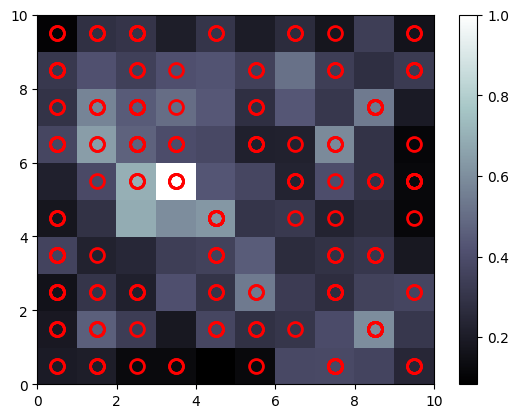

In [9]:
import matplotlib.pyplot as plt
from pylab import bone, pcolor, colorbar, plot, show

# Visualize the SOM
bone()
pcolor(som.distance_map().T)  # distance map
colorbar()

# Plot customer points
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X_scaled):
    w = som.winner(x)  # get winning node
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[0],
         markerfacecolor='None',
         markeredgecolor=colors[0],
         markersize=10,
         markeredgewidth=2)
show()
